# 実践的データ分析講座 ３日目：ハンズオン

* １日目の座学でざっと説明した分析を、データを使って実際に行っていきます
* データは [Kaggle](https://www.kaggle.com/) に収録されている [Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance) を使用します
* 本ハンズオンは Google Cloud Platform の Colaboratory を利用します
    * 下の「おまじない」と書かれたセルをクリックし、Shift + Return を押すと Python プログラムが実行されます
    * 説明の流れに従い、Shift + Return を押してプログラムを実行していって下さい

In [1]:
# おまじない
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
sns.set(font_scale=1.5)
import numpy as np
import pandas as pd

## 前処理

最も重要かつ大変だけど、地味で辛い作業

### データの読み込み

* CSV データを読み込む
    * 先頭行にカラムの名前が付いた、ヘッダ付き CSV
    * pandas パッケージを用いて、CSV を読み込むと共に内容を DataFrame 形式に変換し格納

In [2]:
# CSVファイルの読み込み
data = pd.read_csv('insurance.csv', header=0)
# 先頭5行を表示
data.head(n=5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### データの説明

ある国の住人が、医療費としていくら支払ったかのデータ

* `age`: 年齢
* `sex`: 性別
* `bmi`: ボディマス指数（Body Mass Index: 体重(kg)÷(身長(m))${}^2$）
* `children`: 養育している子供の数
* `smoker`: 喫煙しているか否か
* `region`: 住んでいる地域
* `charges`: 支払った医療費の額

In [3]:
# データの数を調べる
data.shape

(1338, 7)

### 欠損値

In [4]:
# 欠損しているデータ数を調べる
data.isnull().sum().sum()

0

In [5]:
# データ除去前の個数確認
data.shape

(1338, 7)

In [6]:
# データが欠損している行（データ点）を除去する
data.dropna(axis='index', how='any', inplace=True)
# データ除去後の個数確認
data.shape

(1338, 7)

### データ重複

In [7]:
# データが重複している数を調べる
data.duplicated().sum()

1

In [8]:
# データ除去前の個数確認
data.shape

(1338, 7)

In [9]:
# 重複している行（データ点）を除去する
data.drop_duplicates(keep='first', ignore_index=True, inplace=True)
# データ除去後の個数確認
data.shape

(1337, 7)

### 分布

データを見る限り、それぞれの項目は以下のデータ種別でありそう。

* `age`: 整数の連続変数
* `sex`: 文字列のカテゴリ変数
* `bmi`: 実数の連続変数
* `children`: 整数の連続変数
* `smoker`: 文字列の
* `region`: 文字列のカテゴリ変数
* `charges`: 実数の連続変数

これらがどのような分布を示すか調べる。

Text(0.5, 1.0, 'distribution of age')

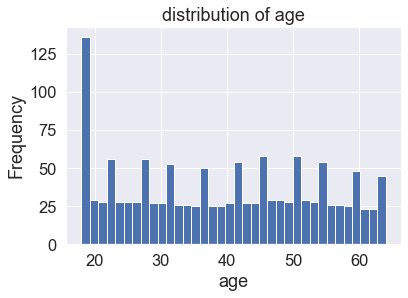

In [10]:
# `age` の分布
data['age'].plot(kind='hist', bins=int(np.sqrt(data.shape[0])))
plt.xlabel('age')
plt.title('distribution of age')

In [11]:
from collections import Counter

# `sex` の分布
pd.DataFrame([
    {'key': k, 'value': v} for k, v in dict(Counter(data['sex'])).items()
]).sort_values('key').reset_index(drop=True)

,key,value
0,female,662
1,male,675


Text(0.5, 1.0, 'distribution of BMI')

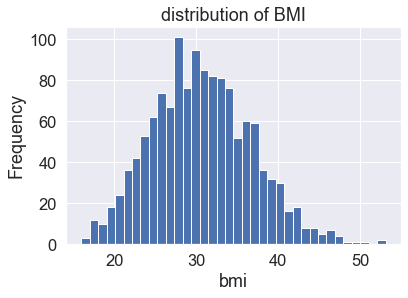

In [12]:
# `bmi` の分布
data['bmi'].plot(kind='hist', bins=int(np.sqrt(data.shape[0])))
plt.xlabel('bmi')
plt.title('distribution of BMI')

In [13]:
# `children` の分布（カテゴリ変数として）
pd.DataFrame([
    {'key': k, 'value': v} for k, v in dict(Counter(data['children'])).items()
]).sort_values('key').reset_index(drop=True)

,key,value
0,0,573
1,1,324
2,2,240
3,3,157
4,4,25
5,5,18


Text(0.5, 1.0, 'distribution of children')

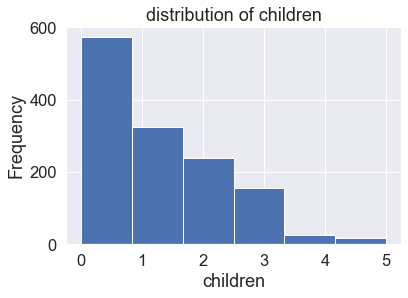

In [14]:
# `children` の分布（連続変数として）
data['children'].plot(kind='hist', bins=int(max(data['children'] + 1)))
plt.xlabel('children')
plt.title('distribution of children')

In [15]:
# `smoker` の分布
pd.DataFrame([
    {'key': k, 'value': v} for k, v in dict(Counter(data['smoker'])).items()
]).sort_values('key').reset_index(drop=True)

,key,value
0,no,1063
1,yes,274


In [16]:
# `region` の分布
pd.DataFrame([
    {'key': k, 'value': v} for k, v in dict(Counter(data['region'])).items()
]).sort_values('key').reset_index(drop=True)

,key,value
0,northeast,324
1,northwest,324
2,southeast,364
3,southwest,325


Text(0.5, 1.0, 'distribution of charges')

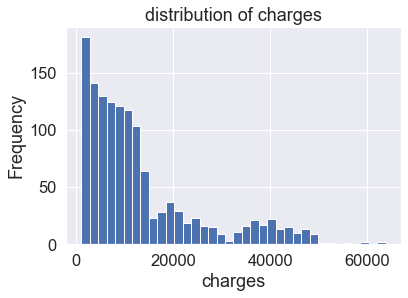

In [17]:
# `charges` の分布
data['charges'].plot(kind='hist', bins=int(np.sqrt(data.shape[0])))
plt.xlabel('charges')
plt.title('distribution of charges')

### カテゴリ変数のダミー変数化

* 対象となるカラム（カテゴリ変数）
    * `sex`
    * `smoker`
    * `region`

In [18]:
# ダミー変数化の説明として、`region` を単純にダミー変数化し、比較する
pd.merge(
    data.loc[:, ['region']],
    pd.get_dummies(data['region'], prefix='region_is'),
    left_index=True, right_index=True
).head(n=5)

,region,region_is_northeast,region_is_northwest,region_is_southeast,region_is_southwest
0,southwest,0,0,0,1
1,southeast,0,0,1,0
2,southeast,0,0,1,0
3,northwest,0,1,0,0
4,northwest,0,1,0,0


In [19]:
# このままだとマルチコを引き起こすので、適当にひとつ除去する
pd.merge(
    data.loc[:, ['region']],
    pd.get_dummies(data['region'], prefix='region_is', drop_first=True),
    left_index=True, right_index=True
).head(n=5)

,region,region_is_northwest,region_is_southeast,region_is_southwest
0,southwest,0,0,1
1,southeast,0,1,0
2,southeast,0,1,0
3,northwest,1,0,0
4,northwest,1,0,0


In [20]:
# すべてのカテゴリ変数をダミー変数化し、元のデータにくっつける
data = pd.concat([
    data,
    pd.get_dummies(data['sex'], prefix='sex_is', drop_first=True),
    pd.get_dummies(data['smoker'], prefix='smoker_is', drop_first=True),
    pd.get_dummies(data['region'], prefix='region_is', drop_first=True),
], axis='columns')
# 元のカテゴリ変数を除去
data.drop(['sex', 'smoker', 'region'], axis='columns', inplace=True)
# 先頭５行を表示
data.head()

,age,bmi,children,charges,sex_is_male,smoker_is_yes,region_is_northwest,region_is_southeast,region_is_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [21]:
# データの個数確認
data.shape

(1337, 9)

### データの統計値

In [22]:
### describe() でデータの統計値を簡単に確認できる
data.describe().round(4)

,age,bmi,children,charges,sex_is_male,smoker_is_yes,region_is_northwest,region_is_southeast,region_is_southwest
count,1337.0000,1337.0000,1337.0000,1337.0000,1337.0000,1337.0000,1337.0000,1337.0000,1337.0000
mean,39.2221,30.6635,1.0957,13279.1215,0.5049,0.2049,0.2423,0.2723,0.2431
std,14.0443,6.1005,1.2056,12110.3597,0.5002,0.4038,0.4287,0.4453,0.4291
min,18.0000,15.9600,0.0000,1121.8739,0.0000,0.0000,0.0000,0.0000,0.0000
25%,27.0000,26.2900,0.0000,4746.3440,0.0000,0.0000,0.0000,0.0000,0.0000
50%,39.0000,30.4000,1.0000,9386.1613,1.0000,0.0000,0.0000,0.0000,0.0000
75%,51.0000,34.7000,2.0000,16657.7174,1.0000,0.0000,0.0000,1.0000,0.0000
max,64.0000,53.1300,5.0000,63770.4280,1.0000,1.0000,1.0000,1.0000,1.0000


### 異常値

* 異常値かどうかは、その値から単純に判定できない
* 分布やデータの意味を理解した上で判定しなければならない

In [23]:
# すべてのカラムの箱ひげ図を並べて表示するため、簡易的に正規化する
data_normed = (data - data.mean(axis='index')) / data.std(axis='index')

Text(0.5, 1.0, 'box plot')

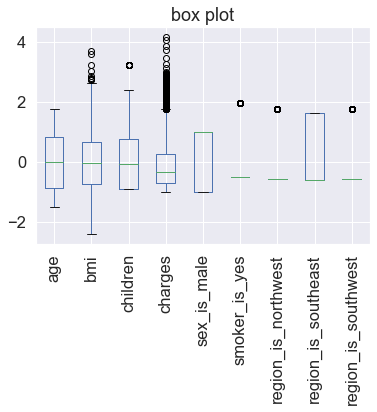

In [24]:
data_normed.plot(kind='box')
plt.xticks(rotation=90)
plt.title('box plot')

異常値をどのように判断するか

* ダミー変数は（箱ひげ図で外れ値となっても）異常値として扱わない
    * データが不均衡（imbalance）の場合は、簡単に異常値と判定されてしまう
* `bmi` の外れ値
    * BMIが大きい人（極度の肥満）は、健康に問題を抱えている可能性が高い
    * ゆえに医療費が高額になると予想される
    * 箱ひげ図としては外れ値だが、重要な意味を持つデータである
    * よって、異常値としては扱わない（除外しない）
* `children` の外れ値
    * 扶養する子供が多い人は、医療費を多く支払う可能性がある
    * 指数分布のような分布をしており、値が多い場合でも異常値とは見做せない
    * よって、異常値としては扱わない（除外しない）
* `charges` の外れ値
    * 医療費が極端に高額な人は、何か問題を抱えていると考えられ、重要なデータである
    * べき分布のような分布をしており、値が多い場合でも異常値とは見做せない
    * よって、異常値としては扱わない（除外しない）
* 以上から、今回のデータでは、異常値の除外処理は行わない

### 相関

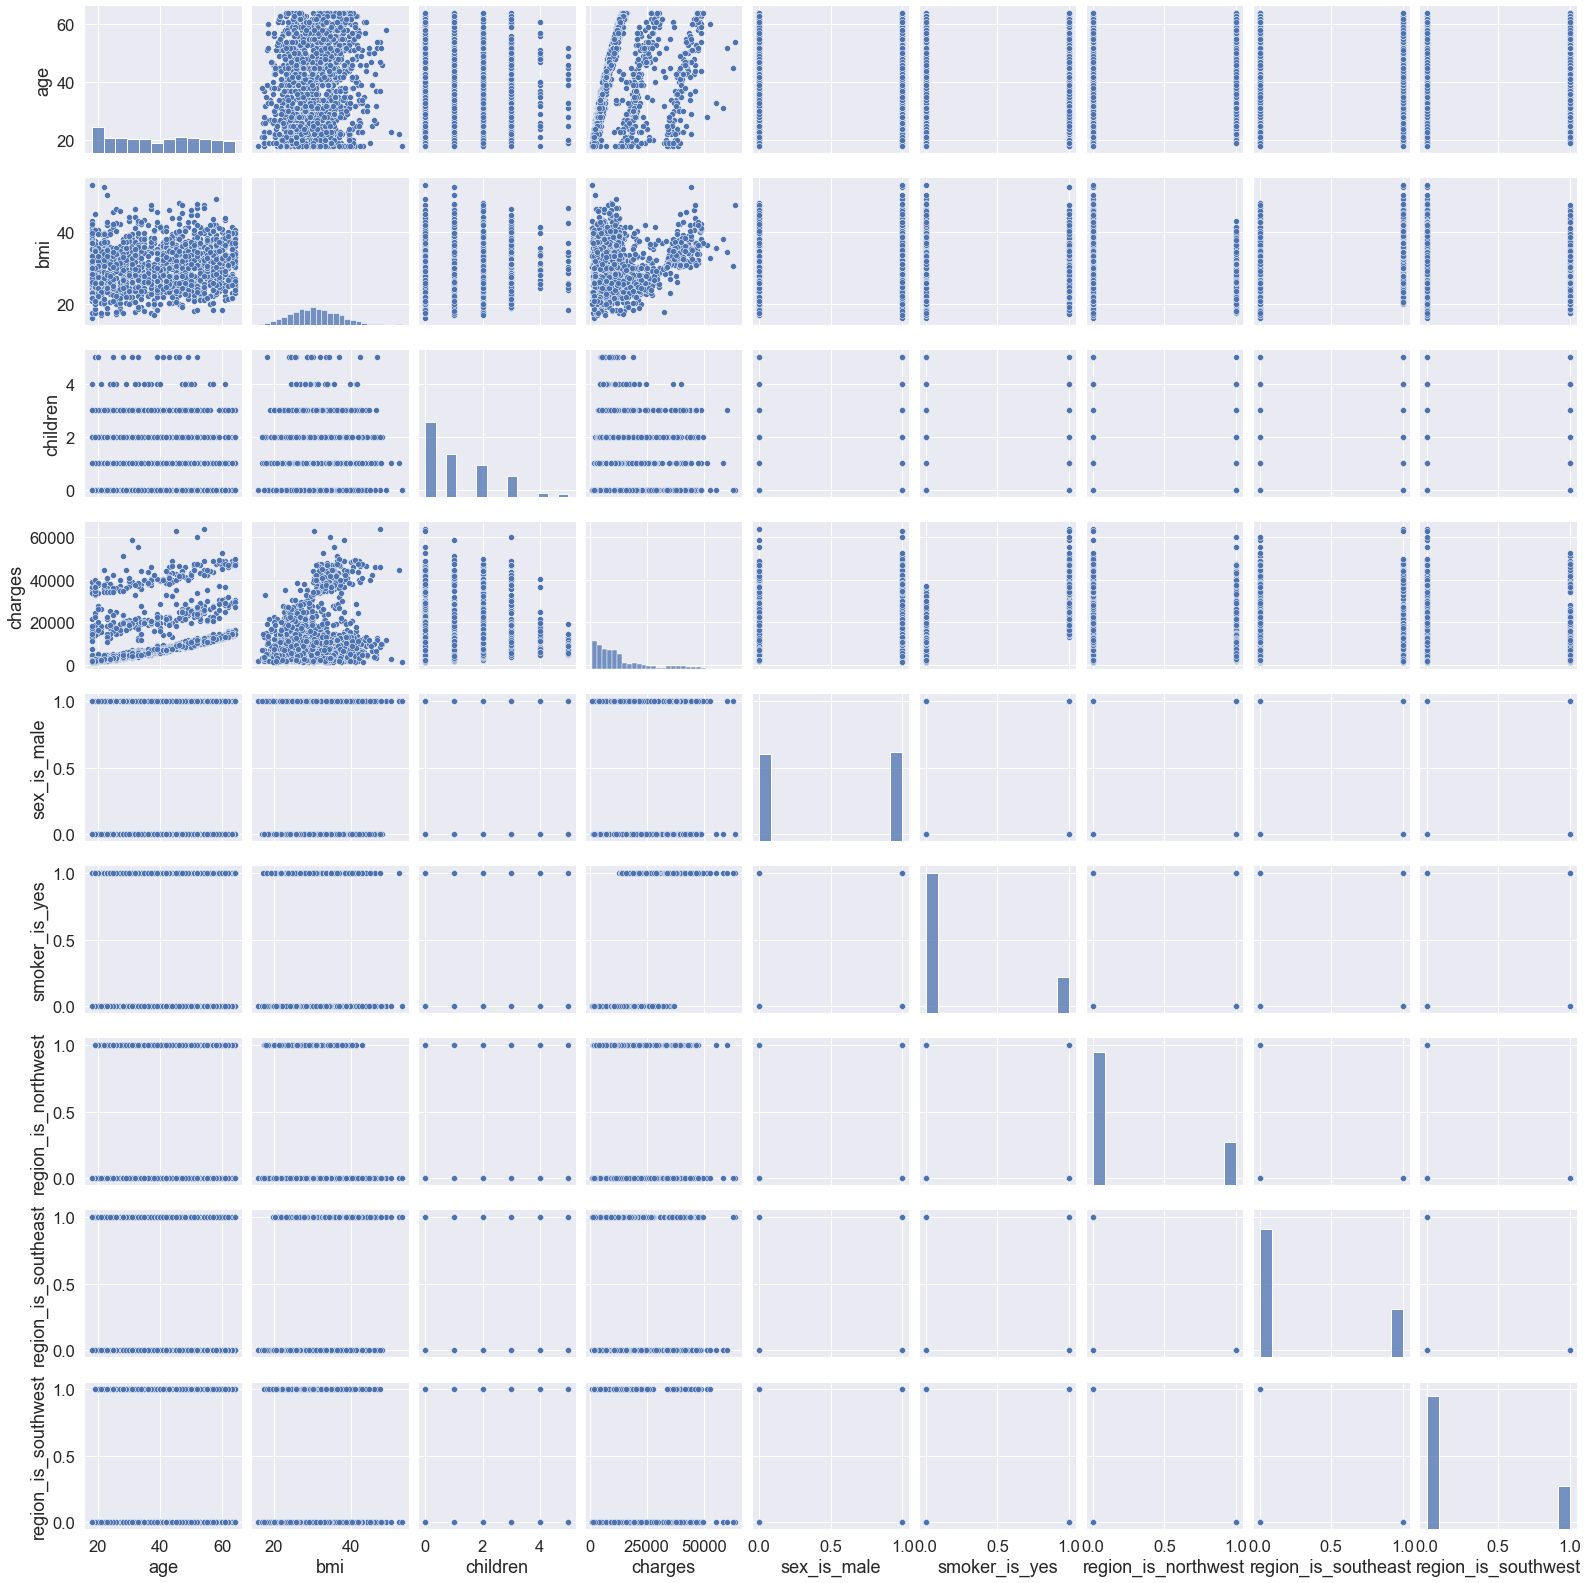

In [25]:
# すべてのカラムの分布と相関を一度に見る簡易的な方法
# カラム数が多い場合はお薦めできない
sns.pairplot(data)

<AxesSubplot:>

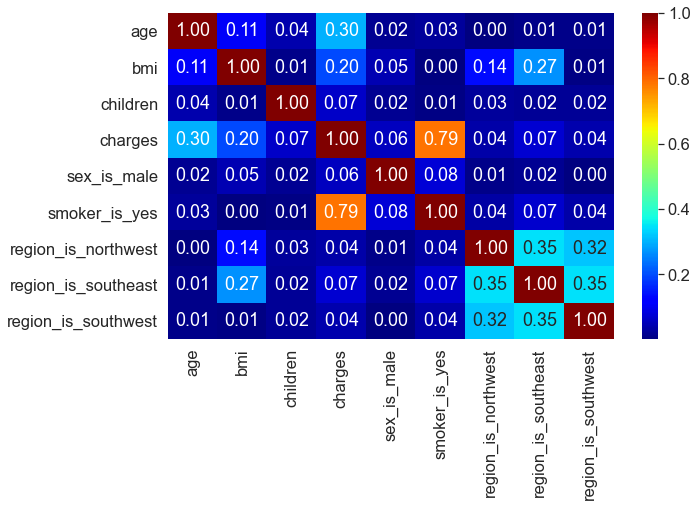

In [26]:
# 相関係数の絶対値をヒートマップで表示する
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.heatmap(data.corr().abs(), cmap='jet', annot=True, fmt='0.2f', ax=ax)

## モデル作成と評価（分類）

* 目的変数として `smoker_is_yes` を設定する
    * 各種データから、その人が喫煙者かどうかを予測する

### 目的変数・特徴量の分離

In [27]:
# 目的変数・特徴量の分離
data_classify_y = data['smoker_is_yes']
data_classify_X = data.drop('smoker_is_yes', axis='columns')
# データ数の確認
data_classify_X.shape, data_classify_y.shape

((1337, 8), (1337,))

### 学習用・検証用データの分離

In [28]:
from sklearn.model_selection import train_test_split

# 学習用・検証用データの分離
# `smoker_is_yes` は imbalance なので、stratify を指定する
(
    data_classify_train_X, data_classify_test_X,
    data_classify_train_y, data_classify_test_y
) = train_test_split(
    data_classify_X, data_classify_y,
    stratify=data_classify_y,
    test_size=0.3, random_state=14
)

### 重要なポイント：再現性の確保

* scikit-learn パッケージ(sklearn)で `random_state` バラメータがある関数は、必ずこれを指定する
    * 乱数を用いるアルゴリズム
    * `random_state` を付けないと、関数を実行するたびに違う結果になる
    * 良い精度のモデルが作成できたとしても、それを再現することが出来ない

In [29]:
# データ数の確認（学習用データ）
data_classify_train_X.shape, data_classify_train_y.shape

((935, 8), (935,))

In [30]:
# データ数の確認（検証用データ）
data_classify_test_X.shape, data_classify_test_y.shape

((402, 8), (402,))

In [31]:
# 目的変数の分布の確認（学習用データ）
pd.DataFrame([
    {'key': k, 'value': v} for k, v in dict(Counter(data_classify_train_y)).items()
]).sort_values('key').reset_index(drop=True)

,key,value
0,0,743
1,1,192


In [32]:
# データ数に対する喫煙者の割合（学習用データ）
round(
    Counter(data_classify_train_y)[1] / data_classify_train_y.shape[0], 3
)

0.205

In [33]:
# 目的変数の分布の確認（検証用データ）
pd.DataFrame([
    {'key': k, 'value': v} for k, v in dict(Counter(data_classify_test_y)).items()
]).sort_values('key').reset_index(drop=True)

,key,value
0,0,320
1,1,82


In [34]:
# データ数に対する喫煙者の割合（検証用データ）
round(
    Counter(data_classify_test_y)[1] / data_classify_test_y.shape[0], 3
)

0.204

### 特徴量エンジニアリング

* 残念ながら、このデータへの知見は持ち合わせてないので、知見による特徴エンジニアリングは出来ない
* 対数化
    * `charges` の分布がべき分布に近いので、`charges` を対数化する
* 離散化
    * `charges` の分布には３つの山があるように見えるので、`charges` を３つにクラスタリングする
* 本来ならば、同じカラムに２種類の特徴量エンジニアリングはやらない
    * マルチコになるだけだから
    * 今回は例として無理に行う

In [35]:
# `charges` の対数化
data_classify_train_X = data_classify_train_X.assign(
    log_charges=np.log(data_classify_train_X['charges'] + 1)
)

Text(0.5, 1.0, 'clustering (discretize) charges')

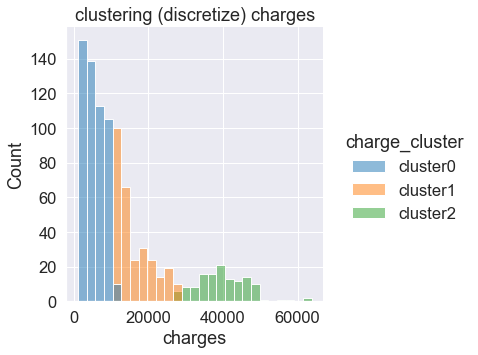

In [36]:
# クラスタリングとしては k-Means を用いる（1次元 k-Means）
# k-Means は距離を用いるため、正規化が必要
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 正規化
ss_kmeans = StandardScaler()
data_clustering_train_X = ss_kmeans.fit_transform(
    data_classify_train_X.loc[:, ['charges']]
)
# k-Meansの学習
km_charges = KMeans(
    n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=14
).fit(
    data_clustering_train_X
)
# クラスタ番号は適当に付くので、中心の値が小さい順に振り直す
# そのための辞書を作成
km_cluster_map = {
    c: f'cluster{i}' for i, c in enumerate(
        km_charges.cluster_centers_.ravel().argsort()
    )
}
# k-Meansの予測結果を振り直しつつ格納
data_classify_train_X = data_classify_train_X.assign(
    charge_cluster=[
        km_cluster_map[x] for x in km_charges.predict(data_clustering_train_X)
    ]
)
# k-Meansの結果を可視化
sns.displot(
    data=data_classify_train_X, x='charges', palette='tab10',
    hue='charge_cluster', hue_order=['cluster0', 'cluster1', 'cluster2']
)
plt.title('clustering (discretize) charges')

In [37]:
# k-Meansの予測結果をダミー変数化
data_classify_train_X = pd.concat([
    data_classify_train_X,
    pd.get_dummies(
        data_classify_train_X['charge_cluster'],
        prefix='charge_is', drop_first=True
    ),
], axis='columns')
# `charges` と `charge_cluster` を除去
data_classify_train_X.drop(
    ['charges', 'charge_cluster'], axis='columns', inplace=True
)
# 先頭５行を表示
data_classify_train_X.head(n=5)

,age,bmi,children,sex_is_male,region_is_northwest,region_is_southeast,region_is_southwest,log_charges,charge_is_cluster1,charge_is_cluster2
640,42,28.310,3,1,1,0,0,10.397832,0,1
766,42,29.000,1,0,0,0,1,8.861016,0,0
1219,30,21.945,1,0,0,0,0,8.459395,0,0
1305,29,21.850,0,0,0,0,0,9.687587,1,0
108,29,27.940,0,1,0,1,0,7.961412,0,0


In [38]:
# 検証用データにも同じことをする
# （学習は一切行わず、予測のみ）

# 対数化
data_classify_test_X = data_classify_test_X.assign(
    log_charges=np.log(data_classify_test_X['charges'] + 1)
)
# k-Meansのための正規化
data_clustering_test_X = ss_kmeans.transform(
    data_classify_test_X.loc[:, ['charges']]
)
# k-Meansの予測結果を格納
data_classify_test_X = data_classify_test_X.assign(
    charge_cluster=[
        km_cluster_map[x] for x in km_charges.predict(data_clustering_test_X)
    ]
)
# k-Meansの予測結果をダミー変数化
data_classify_test_X = pd.concat([
    data_classify_test_X,
    pd.get_dummies(
        data_classify_test_X['charge_cluster'],
        prefix='charge_is', drop_first=True
    ),
], axis='columns')
# `charges` と `charge_cluster` を除去
data_classify_test_X.drop(
    ['charges', 'charge_cluster'], axis='columns', inplace=True
)
# 先頭５行を表示
data_classify_test_X.head(n=5)

,age,bmi,children,sex_is_male,region_is_northwest,region_is_southeast,region_is_southwest,log_charges,charge_is_cluster1,charge_is_cluster2
269,49,25.840,1,1,0,0,0,9.135992,0,0
1038,19,27.265,2,1,1,0,0,10.021033,1,0
871,42,24.860,0,1,0,1,0,8.694148,0,0
205,28,28.880,1,0,0,0,0,8.375338,0,0
1306,32,28.120,4,1,1,0,0,9.974574,1,0


In [39]:
# データ数の確認
data_classify_train_X.shape, data_classify_test_X.shape

((935, 10), (402, 10))

<AxesSubplot:>

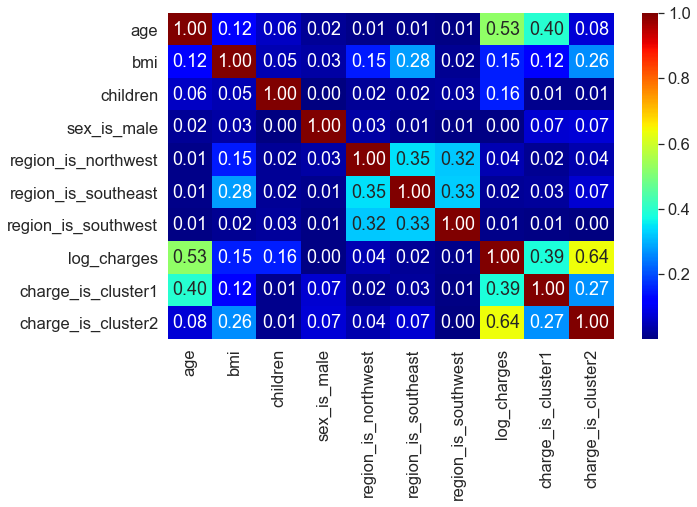

In [40]:
# 特徴量を追加したため、相関を再確認する
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.heatmap(data_classify_train_X.corr().abs(), cmap='jet', annot=True, fmt='0.2f', ax=ax)

### 正規化

* Support Vector Machine のために、データを正規化する
    * Random Forest は正規化したデータは使わない

In [41]:
# 正規化
ss_classify = StandardScaler().fit(
    data_classify_train_X
)
# 学習用データ
data_classify_train_X_normed = ss_classify.transform(
    data_classify_train_X
)
# 検証用データ
data_classify_test_X_normed = ss_classify.transform(
    data_classify_test_X
)

### 次元圧縮

今回は次元圧縮したデータは使わないが、例として行う

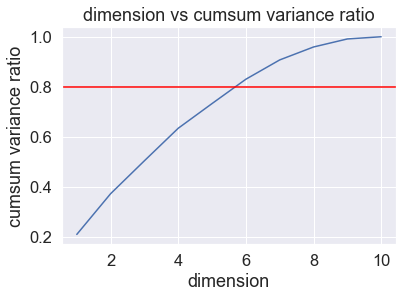

In [42]:
from sklearn.decomposition import PCA

# 圧縮しても十分に意味が残る累積寄与率の閾値を 0.8 とする
cumsum_variance_ratio_threshold = 0.8
# まずは全く圧縮しないPCAを行う
pca_full = PCA(
    n_components=data_classify_train_X_normed.shape[1], random_state=14
).fit(data_classify_train_X_normed)
# 累積寄与率のグラフを描く
pd.DataFrame({
    'dimension': range(1, data_classify_train_X_normed.shape[1] + 1),
    'cumsum_variance_ratio': np.cumsum(pca_full.explained_variance_ratio_),
}).plot(kind='line', x='dimension', y='cumsum_variance_ratio')
plt.ylabel('cumsum variance ratio')
plt.title('dimension vs cumsum variance ratio')
plt.axhline(cumsum_variance_ratio_threshold, color='red')
plt.legend().remove()

In [43]:
# 圧縮後の次元数の計算
decomposed_dimension = range(
    1, data_classify_train_X_normed.shape[1] + 1
)[
    np.min(np.where(np.cumsum(
        pca_full.explained_variance_ratio_
    ) > cumsum_variance_ratio_threshold))
]
decomposed_dimension

6

In [44]:
# 算出した次元数へ圧縮
pca_decompose = PCA(
    n_components=decomposed_dimension, random_state=14
).fit(data_classify_train_X_normed)
# 学習データを圧縮
data_classify_train_X_decomposed = pca_decompose.transform(
    data_classify_train_X_normed
)
# 検証データを圧縮
data_classify_test_X_decomposed = pca_decompose.transform(
    data_classify_test_X_normed
)

### Support Vector Machine

In [45]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon

# Cross Validation で探索するHyper Parameter
# 目的変数がimbalanceの場合は、`class_weight` として None と 'balanced' を探索する
hparams_classify_svc = {
    'C': expon(scale=1),
    'class_weight': [None, 'balanced'],
}
# Cross Validation
# マルチコが発生する可能性があるため、ペナルティをL2に設定
# Cross Validation の評価指標としてはF1値を採用
# 特徴量は、特徴量エンジニアリングを行い、正規化したものを用いる
svc_classify = LinearSVC(penalty='l2', max_iter=1000, random_state=14)
skf_classify_svc = StratifiedKFold(n_splits=5, shuffle=True, random_state=14)
hpsearch_classify_svc = RandomizedSearchCV(
    svc_classify, hparams_classify_svc, cv=skf_classify_svc, scoring='f1',
    n_iter=10, n_jobs=-1, refit=True, random_state=14
).fit(data_classify_train_X_normed, data_classify_train_y)

In [46]:
# Cross Validation の結果、最善とされた Hyper Parameter
pd.DataFrame([
    {'Hyper Parameter': k, 'value': v} for k, v in hpsearch_classify_svc.best_params_.items()
])

,Hyper Parameter,value
0,C,0.72143
1,class_weight,NaN


In [47]:
# 学習データで作成した最善モデルの、予測結果のF1値
hpsearch_classify_svc.best_score_

0.8946684346308429

In [48]:
from sklearn.metrics import classification_report

# 検証データで予測する
pred_classify_svc_test = hpsearch_classify_svc.best_estimator_.predict(
    data_classify_test_X_normed
)
# 検証データの予測結果を評価する
pd.DataFrame(classification_report(
    data_classify_test_y, pred_classify_svc_test, output_dict=True,
    target_names=['smorker_is_no', 'smorker_is_yes']
)).T

,precision,recall,f1-score,support
smorker_is_no,0.993569,0.965625,0.979398,320.000000
smorker_is_yes,0.879121,0.975610,0.924855,82.000000
accuracy,0.967662,0.967662,0.967662,0.967662
macro avg,0.936345,0.970617,0.952127,402.000000
weighted avg,0.970224,0.967662,0.968272,402.000000


In [49]:
from sklearn.metrics import confusion_matrix

# 検証データの正解・不正解を可視化する
pd.DataFrame(
    confusion_matrix(data_classify_test_y, pred_classify_svc_test).T,
    index=['predicted_smorker_is_no', 'predicted_smorker_is_yes'],
    columns=['smorker_is_no', 'smorker_is_yes']
).loc[
    ['predicted_smorker_is_yes', 'predicted_smorker_is_no'],
    ['smorker_is_yes', 'smorker_is_no']
]

,smorker_is_yes,smorker_is_no
predicted_smorker_is_yes,80,11
predicted_smorker_is_no,2,309


### Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Cross Validation で探索するHyper Parameter
# 目的変数がimbalanceの場合は、`class_weight` として None と 'balanced' を探索する
hparams_classify_rfc = {
    'n_estimators': randint(low=10, high=100),
    'max_depth': randint(low=2, high=10),
    'class_weight': [None, 'balanced'],
}
# Cross Validation
# マルチコが発生する可能性があるため、ペナルティをL2に設定
# Cross Validation の評価指標としてはF1値を採用
# 特徴量は、特徴量エンジニアリングは行ったが、正規化していないものを用いる
rfc_classify = RandomForestClassifier(random_state=14)
skf_classify_rfc = StratifiedKFold(n_splits=5, shuffle=True, random_state=14)
hpsearch_classify_rfc = RandomizedSearchCV(
    rfc_classify, hparams_classify_rfc, cv=skf_classify_rfc, scoring='f1',
    n_iter=10, n_jobs=-1, refit=True, random_state=14
).fit(data_classify_train_X, data_classify_train_y)

In [51]:
# Cross Validation の結果、最善とされた Hyper Parameter
pd.DataFrame([
    {'Hyper Parameter': k, 'value': v} for k, v in hpsearch_classify_rfc.best_params_.items()
])

,Hyper Parameter,value
0,class_weight,balanced
1,max_depth,6
2,n_estimators,87


In [52]:
# 学習データで作成した最善モデルの、予測結果のF1値
hpsearch_classify_rfc.best_score_

0.9124251026842167

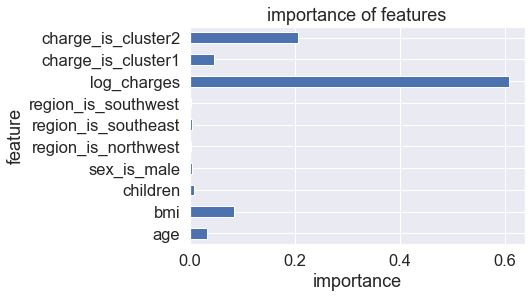

In [53]:
# feature importance（特徴量の重要度）の可視化
pd.DataFrame({
    'feature': data_classify_train_X.columns,
    'importance': hpsearch_classify_rfc.best_estimator_.feature_importances_,
}).plot(kind='barh', x='feature', y='importance')
plt.xlabel('importance')
plt.title('importance of features')
plt.legend().remove()

In [54]:
# 検証データで予測する
pred_classify_rfc_test = hpsearch_classify_rfc.best_estimator_.predict(
    data_classify_test_X
)
# 検証データの予測結果を評価する
pd.DataFrame(classification_report(
    data_classify_test_y, pred_classify_rfc_test, output_dict=True,
    target_names=['smorker_is_no', 'smorker_is_yes']
)).T

,precision,recall,f1-score,support
smorker_is_no,0.993590,0.968750,0.981013,320.000000
smorker_is_yes,0.888889,0.975610,0.930233,82.000000
accuracy,0.970149,0.970149,0.970149,0.970149
macro avg,0.941239,0.972180,0.955623,402.000000
weighted avg,0.972233,0.970149,0.970655,402.000000


In [55]:
# 検証データの正解・不正解を可視化する
pd.DataFrame(
    confusion_matrix(data_classify_test_y, pred_classify_rfc_test).T,
    index=['predicted_smorker_is_no', 'predicted_smorker_is_yes'],
    columns=['smorker_is_no', 'smorker_is_yes']
).loc[
    ['predicted_smorker_is_yes', 'predicted_smorker_is_no'],
    ['smorker_is_yes', 'smorker_is_no']
]

,smorker_is_yes,smorker_is_no
predicted_smorker_is_yes,80,10
predicted_smorker_is_no,2,310


## モデル作成と評価（回帰）

* 目的変数として `charges` を設定する
    * 各種データから、その人の医療費を予測する

### 目的変数・特徴量の分離

In [56]:
# 目的変数・特徴量の分離
data_regress_y = data['charges']
data_regress_X = data.drop('charges', axis='columns')
# データ数の確認
data_regress_X.shape, data_regress_y.shape

((1337, 8), (1337,))

### 学習用・検証用データの分離

In [57]:
# 学習用・検証用データの分離
# 回帰なのでimbalanceという概念は存在せず、stratifyは出来ない
(
    data_regress_train_X, data_regress_test_X,
    data_regress_train_y, data_regress_test_y
) = train_test_split(
    data_regress_X, data_regress_y,
    test_size=0.3, random_state=14
)

### Support Vector Machine

In [58]:
from sklearn.model_selection import KFold
from sklearn.svm import LinearSVR

# Cross Validation で探索するHyper Parameter
hparams_regress_svr = {
    'C': expon(scale=1),
}
# Cross Validation
# Cross Validation の評価指標としては、`charges` がべき分布なので、MSLE（平均２乗対数誤差）を採用
# 線形 Shallow モデルで回帰を行うが、目的変数に大きな値が含まれる場合、
# 偏回帰係数がペナルティで抑え込まれてしまうため、非常に悪い結果になる。
# よって、今回は特徴量の正規化をわざと行わない。
svr_regress = LinearSVR(max_iter=1000, random_state=14)
kf_regress_svr = KFold(n_splits=5, shuffle=True, random_state=14)
hpsearch_regress_svr = RandomizedSearchCV(
    svr_regress, hparams_regress_svr, cv=kf_regress_svr,
    scoring='neg_mean_squared_log_error',
    n_iter=10, n_jobs=-1, refit=True, random_state=14
).fit(data_regress_train_X, data_regress_train_y)

In [59]:
# Cross Validation の結果、最善とされた Hyper Parameter
pd.DataFrame([
    {'Hyper Parameter': k, 'value': v} for k, v in hpsearch_regress_svr.best_params_.items()
])

,Hyper Parameter,value
0,C,3.160695


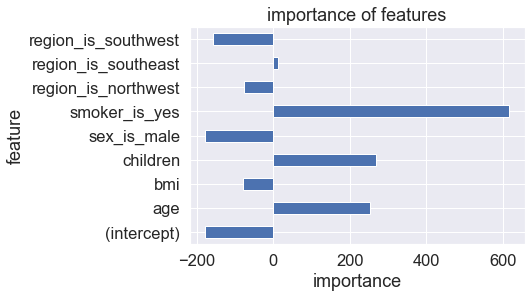

In [60]:
# 偏回帰係数の可視化
pd.DataFrame({
    'feature': ['(intercept)'] + list(data_regress_train_X.columns),
    'importance': list(
        hpsearch_regress_svr.best_estimator_.intercept_
    ) + list(
        hpsearch_regress_svr.best_estimator_.coef_
    ),
}).plot(kind='barh', x='feature', y='importance')
plt.xlabel('importance')
plt.title('importance of features')
plt.legend().remove()

Text(0.5, 1.0, 'prediction of `charges` (Support Vector Machine)')

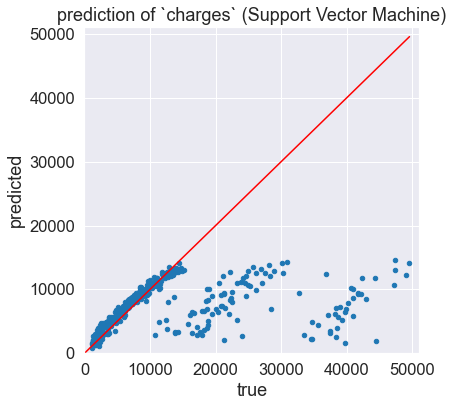

In [61]:
# 検証データで予測する
pred_regress_svr_test = hpsearch_regress_svr.best_estimator_.predict(
    data_regress_test_X
)
# 検証データの予測結果を可視化する
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
pd.DataFrame({
    'true': data_regress_test_y,
    'predicted': pred_regress_svr_test
}).plot(kind='scatter', x='true', y='predicted', ax=ax, color=sns.color_palette('tab10')[0])
maxval = max(np.max(data_regress_test_y), np.max(pred_regress_svr_test))
ax.plot((0, maxval), (0, maxval), color='red')
plt.xlim((0, 1.03 * maxval))
plt.ylim((0, 1.03 * maxval))
plt.title('prediction of `charges` (Support Vector Machine)')

### Random Forest

In [62]:
from sklearn.ensemble import RandomForestRegressor

# Cross Validation で探索するHyper Parameter
hparams_regress_rfr = {
    'n_estimators': randint(low=10, high=200),
    'max_depth': randint(low=2, high=10),
}
# Cross Validation
# Cross Validation の評価指標としては、`charges` がべき分布なので、MSLE（平均２乗対数誤差）を採用
rfr_regress = RandomForestRegressor(random_state=14)
kf_regress_rfr = KFold(n_splits=5, shuffle=True, random_state=14)
hpsearch_regress_rfr = RandomizedSearchCV(
    rfr_regress, hparams_regress_rfr, cv=kf_regress_rfr,
    scoring='neg_mean_squared_log_error',
    n_iter=10, n_jobs=-1, refit=True, random_state=14
).fit(data_regress_train_X, data_regress_train_y)

In [63]:
# Cross Validation の結果、最善とされた Hyper Parameter
pd.DataFrame([
    {'Hyper Parameter': k, 'value': v} for k, v in hpsearch_regress_rfr.best_params_.items()
])

,Hyper Parameter,value
0,max_depth,4
1,n_estimators,166


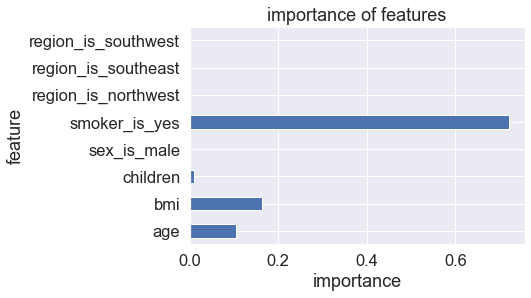

In [64]:
# feature importance（特徴量の重要度）の可視化
pd.DataFrame({
    'feature': data_regress_train_X.columns,
    'importance': hpsearch_regress_rfr.best_estimator_.feature_importances_,
}).plot(kind='barh', x='feature', y='importance')
plt.xlabel('importance')
plt.title('importance of features')
plt.legend().remove()

Text(0.5, 1.0, 'prediction of `charges` (Random Forest)')

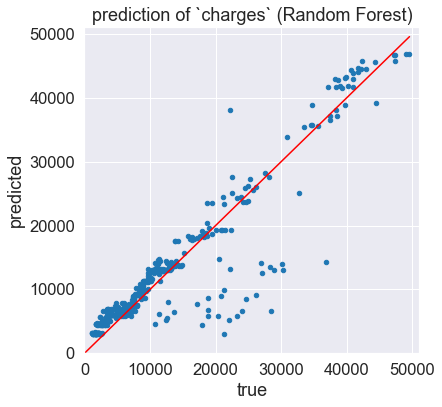

In [65]:
# 検証データで予測する
pred_regress_rfr_test = hpsearch_regress_rfr.best_estimator_.predict(
    data_regress_test_X
)
# 検証データの予測結果を可視化する
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
pd.DataFrame({
    'true': data_regress_test_y,
    'predicted': pred_regress_rfr_test
}).plot(kind='scatter', x='true', y='predicted', ax=ax, color=sns.color_palette('tab10')[0])
maxval = max(np.max(data_regress_test_y), np.max(pred_regress_svr_test))
ax.plot((0, maxval), (0, maxval), color='red')
plt.xlim((0, 1.03 * maxval))
plt.ylim((0, 1.03 * maxval))
plt.title('prediction of `charges` (Random Forest)')

Text(0.5, 1.0, 'distribution of regresssion error')

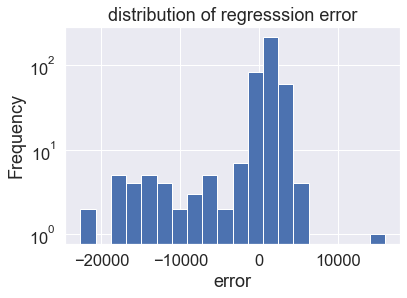

In [66]:
# 誤差の可視化
(pred_regress_rfr_test - data_regress_test_y).plot(kind='hist', bins=20, logy=True)
plt.xlabel('error')
plt.title('distribution of regresssion error')

In [67]:
from sklearn.metrics import mean_squared_log_error

# 誤差の評価値
mean_squared_log_error(data_regress_test_y, pred_regress_rfr_test)

0.1819696577545101

## モデルの Stacking

* やはり回帰問題は難しい
    * Support Vector Machine では、予測結果が３つの部分に分かれており、それぞれに bias を掛ける（ゲタを履かせる）ことが必要そう
        * ちょうど `charges` を３つにクラスタリングした結果のように
    * Random Forest では、真ん中のクラスタに相当するデータで誤差が大きい
* 回帰は難しくても、分類は出来るのではないか
    * `charges` のクラスタを予測する
* 本当に `charges` の詳細な値を予測することが必要だったのか
    * 例えば `charges` を予測する目的が「高額の医療費を払っている人に新しい保険商品を宣伝したい」というものであった場合
    * 正確な医療費を予測することは必要なく、「高額の医療費を払っている人」（cluster2に相当）を予測するだけで良い
    * **より簡単で精度の高い手法を用いて、効果的にビジネス目的（KPI）を実現する**
* それでもやはり `charges` の値を予測することが必要だった
    * 分類でクラスタを精度良く予測できた、とする
    * その値を特徴量に加えることで、`charges` の値を精度良く予測することが出来ないだろうか
    * ２段階の予測を行う（分類し、そして回帰する）
* Ensemble と Stacking
    * 複数のモデルを組み合わせる手法は、大きく２種類存在する
    * Ensemble
        * 複数のモデルの予測結果を寄せ集めて、その結果から最終的な値を予測する
    * Stacking
        * あるモデルの予測結果を特徴量に加え、そして次のモデルの予測を行う
    * この場合は Stacking に相当
* 分析方針
    * `charges` を1次元 k-Means したものを用い、`charges` をクラスタに変換したものを目的変数とし、分類を行う
        * 精度がわずかに良かった Random Forest を用いる
    * その結果を特徴量に加え、`charges` を予測する回帰を行う
        * こちらも Random Forest を用いる
        * Support Vector Machine を用いても、偏回帰係数にかかるペナルティにより、bias に十分な値にならない
        * Support Vecotr Machine を用いるなら、予測したクラスタ毎に分けて学習し、予測するべき

### Stacking １段目：クラスタの分類

In [68]:
# `charges`（回帰の目的変数）をクラスタ番号に変換
data_stack_train_y = [
    int(km_cluster_map[x][-1]) for x in km_charges.predict(
        ss_kmeans.transform(data_regress_train_y.to_numpy().reshape(-1, 1))
    )
]
data_stack_test_y = [
    int(km_cluster_map[x][-1]) for x in km_charges.predict(
        ss_kmeans.transform(data_regress_test_y.to_numpy().reshape(-1, 1))
    )
]

In [69]:
# クラスタに属するデータの個数の分布（学習データ）
pd.DataFrame([
    {'key': k, 'value': v} for k, v in dict(Counter(data_stack_train_y)).items()
]).sort_values('key').reset_index(drop=True)

,key,value
0,0,519
1,1,286
2,2,130


In [70]:
# クラスタに属するデータの個数の分布（評価データ）
pd.DataFrame([
    {'key': k, 'value': v} for k, v in dict(Counter(data_stack_test_y)).items()
]).sort_values('key').reset_index(drop=True)

,key,value
0,0,235
1,1,123
2,2,44


In [71]:
# １段目の学習

# Cross Validation で探索するHyper Parameter
hparams_stack_rfc = {
    'n_estimators': randint(low=10, high=100),
    'max_depth': randint(low=2, high=10),
    'class_weight': [None, 'balanced'],
}
# Cross Validation
# `smorker`の分類を行った時は２値分類だったが、
# 今回は３クラスの分類（multiclass classification）であるため、
# Cross Validation の評価値として F1 macro を用いる
rfc_stack = RandomForestClassifier(random_state=14)
skf_stack_rfc = StratifiedKFold(n_splits=5, shuffle=True, random_state=14)
hpsearch_stack_rfc = RandomizedSearchCV(
    rfc_stack, hparams_stack_rfc, cv=skf_stack_rfc, scoring='f1_macro',
    n_iter=10, n_jobs=-1, refit=True, random_state=14
).fit(data_regress_train_X, data_stack_train_y)

In [72]:
# Cross Validation の結果、最善とされた Hyper Parameter
pd.DataFrame([
    {'Hyper Parameter': k, 'value': v} for k, v in hpsearch_stack_rfc.best_params_.items()
])

,Hyper Parameter,value
0,class_weight,balanced
1,max_depth,9
2,n_estimators,42


In [73]:
# 学習データで作成した最善モデルの、予測結果のF1値
hpsearch_stack_rfc.best_score_

0.9018530402044913

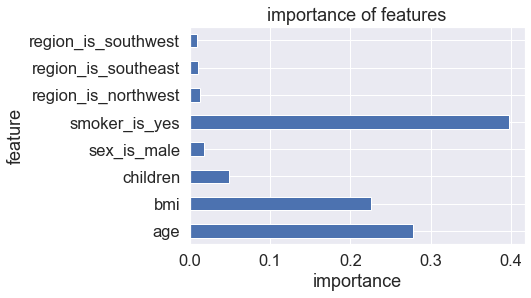

In [74]:
# feature importance（特徴量の重要度）の可視化
pd.DataFrame({
    'feature': data_regress_train_X.columns,
    'importance': hpsearch_stack_rfc.best_estimator_.feature_importances_,
}).plot(kind='barh', x='feature', y='importance')
plt.xlabel('importance')
plt.title('importance of features')
plt.legend().remove()

In [75]:
# 検証データで予測する
pred_stack_rfc_test = hpsearch_stack_rfc.best_estimator_.predict(
    data_regress_test_X
)
# 検証データの予測結果を評価する
pd.DataFrame(classification_report(
    data_stack_test_y, pred_stack_rfc_test, output_dict=True,
    target_names=['cluster0', 'cluster1', 'cluster2']
)).T

,precision,recall,f1-score,support
cluster0,0.891473,0.978723,0.933063,235.000000
cluster1,0.893204,0.747967,0.814159,123.000000
cluster2,0.902439,0.840909,0.870588,44.000000
accuracy,0.893035,0.893035,0.893035,0.893035
macro avg,0.895705,0.855867,0.872603,402.000000
weighted avg,0.893203,0.893035,0.889844,402.000000


In [76]:
# 検証データの正解・不正解を可視化する
pd.DataFrame(
    confusion_matrix(data_stack_test_y, pred_stack_rfc_test).T,
    index=['predicted_cluster0', 'predicted_cluster1', 'predicted_cluster2'],
    columns=['cluster0', 'cluster1', 'cluster2']
).loc[
    ['predicted_cluster0', 'predicted_cluster1', 'predicted_cluster2'],
    ['cluster0', 'cluster1', 'cluster2']
]

,cluster0,cluster1,cluster2
predicted_cluster0,230,27,1
predicted_cluster1,5,92,6
predicted_cluster2,0,4,37


### Stacking ２段目：`charges` の回帰

In [77]:
# １段目の結果を特徴量に入れ込む
data_stack_train_X = data_regress_train_X.assign(
    charge_cluster=hpsearch_stack_rfc.best_estimator_.predict(
        data_regress_train_X
    )
)
# クラスタ番号をダミー変数化
data_stack_train_X = pd.concat([
    data_stack_train_X,
    pd.get_dummies(data_stack_train_X['charge_cluster'], prefix='charge_cluster', drop_first=True),
], axis='columns')
# `charge_cluster`を除去
data_stack_train_X.drop('charge_cluster', axis='columns', inplace=True)
# 先頭５行を表示
data_stack_train_X.head(n=5)

,age,bmi,children,sex_is_male,smoker_is_yes,region_is_northwest,region_is_southeast,region_is_southwest,charge_cluster_1,charge_cluster_2
673,44,43.89,2,0,1,0,1,0,0,1
163,32,29.80,2,0,0,0,0,1,0,0
1258,52,23.18,0,0,0,0,0,0,0,0
794,27,28.50,0,1,1,1,0,0,1,0
382,55,33.00,0,1,0,0,1,0,1,0


In [78]:
# ２段目の学習

# Cross Validation で探索するHyper Parameter
hparams_stack_rfr = {
    'n_estimators': randint(low=10, high=200),
    'max_depth': randint(low=2, high=10),
}
# Cross Validation
rfr_stack = RandomForestRegressor(random_state=14)
kf_stack_rfr = KFold(n_splits=5, shuffle=True, random_state=14)
hpsearch_stack_rfr = RandomizedSearchCV(
    rfr_stack, hparams_stack_rfr, cv=kf_stack_rfr,
    scoring='neg_mean_squared_log_error',
    n_iter=10, n_jobs=-1, refit=True, random_state=14
).fit(data_stack_train_X, data_regress_train_y)

In [79]:
# Cross Validation の結果、最善とされた Hyper Parameter
pd.DataFrame([
    {'Hyper Parameter': k, 'value': v} for k, v in hpsearch_stack_rfr.best_params_.items()
])

,Hyper Parameter,value
0,max_depth,5
1,n_estimators,98


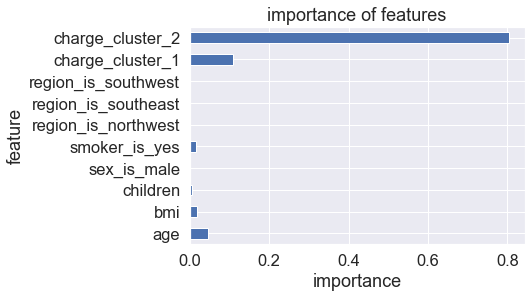

In [80]:
# feature importance（特徴量の重要度）の可視化
pd.DataFrame({
    'feature': data_stack_train_X.columns,
    'importance': hpsearch_stack_rfr.best_estimator_.feature_importances_,
}).plot(kind='barh', x='feature', y='importance')
plt.xlabel('importance')
plt.title('importance of features')
plt.legend().remove()

Text(0.5, 1.0, 'prediction of `charges` (Stacking)')

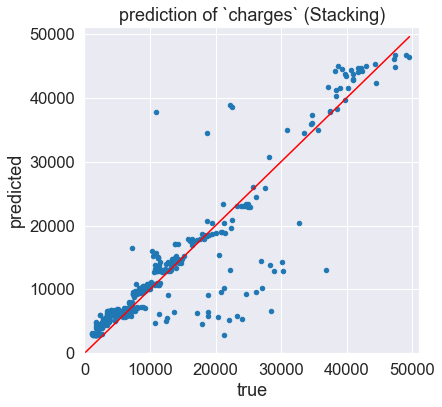

In [81]:
# 検証データで１段目の結果の入れ込みから評価まで一気にやる

# １段目の結果を特徴量に入れ込む
data_stack_test_X = data_regress_test_X.assign(
    charge_cluster=hpsearch_stack_rfc.best_estimator_.predict(
        data_regress_test_X
    )
)
# クラスタ番号をダミー変数化
data_stack_test_X = pd.concat([
    data_stack_test_X,
    pd.get_dummies(data_stack_test_X['charge_cluster'], prefix='charge_cluster', drop_first=True),
], axis='columns')
# `charge_cluster`を除去
data_stack_test_X.drop('charge_cluster', axis='columns', inplace=True)
# `charges`の予測
pred_stack_rfr_test = hpsearch_stack_rfr.best_estimator_.predict(
    data_stack_test_X
)
# 検証データの予測結果を可視化する
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
pd.DataFrame({
    'true': data_regress_test_y,
    'predicted': pred_stack_rfr_test
}).plot(kind='scatter', x='true', y='predicted', ax=ax, color=sns.color_palette('tab10')[0])
maxval = max(np.max(data_regress_test_y), np.max(pred_stack_rfr_test))
ax.plot((0, maxval), (0, maxval), color='red')
plt.xlim((0, 1.03 * maxval))
plt.ylim((0, 1.03 * maxval))
plt.title('prediction of `charges` (Stacking)')

Text(0.5, 1.0, 'distribution of regresssion error')

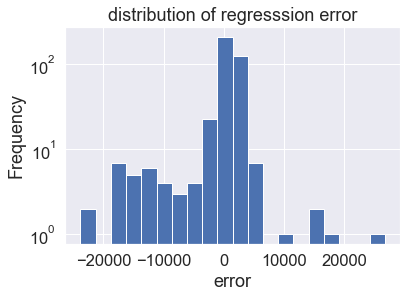

In [82]:
# 誤差の可視化
(pred_stack_rfr_test - data_regress_test_y).plot(kind='hist', bins=20, logy=True)
plt.xlabel('error')
plt.title('distribution of regresssion error')

In [83]:
# 誤差の評価値
mean_squared_log_error(data_regress_test_y, pred_stack_rfr_test)

0.1814260585104333